In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
# Helper functions

def train_model(X_train,y_train, model_list,cv):
    dict_model = {}
    for model in model_list:
        scores = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'), return_train_score=True)
        
        model_name = type(model).__name__
        print(model_name)
    
        df = pd.DataFrame(scores)
        df.loc['ave'] = df.mean()
        display(df)
    
        dict_model[model_name] = df.loc['ave']

    return dict_model

### I. Initializing Processed Data

In [3]:
df_input = pd.read_csv("../../data/processed_data.csv").set_index('Id', drop=True)
df_input.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,No_Promo,...,public_holiday,easter_holiday,christmas,basic,extra,extended,store_type_a,store_type_b,store_type_c,store_type_d
Id,,,,,,,,,,,,,,,,,,,,,
"(1, '2015-04-30')",1,4,6228,650,1,1,0,1270,0,1,...,0,0,0,1,0,0,0,0,1,0
"(1, '2015-04-29')",1,3,5775,579,1,1,0,1270,0,1,...,0,0,0,1,0,0,0,0,1,0
"(1, '2015-04-28')",1,2,5199,552,1,1,0,1270,0,1,...,0,0,0,1,0,0,0,0,1,0
"(1, '2015-04-27')",1,1,5575,574,1,1,0,1270,0,1,...,0,0,0,1,0,0,0,0,1,0
"(1, '2015-04-26')",1,7,0,0,0,0,0,1270,0,1,...,0,0,0,1,0,0,0,0,1,0


### II. Test-Train Split and Scaling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_input.drop('Sales',axis=1), df_input['Sales'], test_size=0.33, random_state=42)

X_train_tr = X_train.copy()
X_test_tr = X_test.copy()

In [5]:
minmax_str = ['Store','Year',"Week","Month", "DayOfWeek"]
scaler = MinMaxScaler().fit(X_train[minmax_str])

X_train_tr.loc[:,minmax_str] = scaler.transform(X_train[minmax_str])
X_test_tr.loc[:,minmax_str] = scaler.transform(X_test[minmax_str])

In [6]:
std_str = ['Customers', 'CompetitionDistance', 'CompetitionOpenSinceDuration', 'Promo2SinceDuration']
scaler_std = StandardScaler().fit(X_train[std_str])

X_train_tr.loc[:,std_str] = scaler_std.transform(X_train[std_str])
X_test_tr.loc[:,std_str] = scaler_std.transform(X_test[std_str])

### III. Model Selection using 10 Fold Cross-Validation

In [7]:
model_list = [LinearRegression(), ElasticNet(), Ridge(), Lasso()]
linear_dict = train_model(X_train_tr,y_train, model_list, 10)

LinearRegression


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.237853,0.024002,0.901658,0.901144,-1200.369578,-1209.398506
1,1.121520,0.023033,0.901232,0.901193,-1202.302378,-1209.174953
2,1.054906,0.025033,0.900651,0.901259,-1223.532546,-1206.804979
3,1.104623,0.023034,0.900830,0.901238,-1211.920376,-1208.105483
4,1.070596,0.022623,0.900721,0.901246,-1202.012884,-1209.218476
5,1.161508,0.024000,0.902070,0.901100,-1202.867724,-1209.110756
6,1.068965,0.023003,0.899544,0.901379,-1213.316304,-1207.949268
7,1.094515,0.025003,0.901872,0.901120,-1199.956849,-1209.446254
8,1.176966,0.024001,0.900753,0.901247,-1222.441868,-1206.927526
9,1.089587,0.023034,0.902512,0.901028,-1206.489882,-1208.838852


ElasticNet


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.519850,0.023002,0.778884,0.778197,-1799.930328,-1811.557763
1,0.568628,0.022998,0.779211,0.777983,-1797.605577,-1812.543636
2,0.649998,0.023000,0.778872,0.777836,-1825.387755,-1810.196588
3,0.498966,0.024681,0.776867,0.778151,-1817.883817,-1810.668459
4,0.715017,0.024999,0.779612,0.778209,-1790.911636,-1812.167544
5,0.546838,0.023000,0.777611,0.777994,-1812.657366,-1811.552400
6,0.518968,0.024999,0.774791,0.778571,-1816.685903,-1810.011156
7,0.512013,0.022998,0.777750,0.778210,-1805.886056,-1811.356633
8,0.516965,0.023000,0.776325,0.778060,-1835.181001,-1809.355449
9,0.499747,0.023000,0.780660,0.777498,-1809.706527,-1812.503737


Ridge


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.403077,0.023001,0.901659,0.901147,-1200.363219,-1209.385284
1,0.368970,0.023030,0.901234,0.901193,-1202.289519,-1209.174604
2,0.347000,0.022762,0.900650,0.901259,-1223.537100,-1206.804157
3,0.354998,0.023001,0.900825,0.901239,-1211.953168,-1208.100525
4,0.346488,0.024000,0.900708,0.901249,-1202.089867,-1209.198514
5,0.373002,0.022030,0.902071,0.901100,-1202.858979,-1209.109244
6,0.353935,0.022998,0.899537,0.901380,-1213.358792,-1207.946416
7,0.350003,0.022998,0.901874,0.901123,-1199.947903,-1209.432112
8,0.351372,0.024998,0.900753,0.901247,-1222.442673,-1206.926646
9,0.355997,0.025000,0.902511,0.901049,-1206.500365,-1208.706876


Lasso


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.804379,0.024001,0.901613,0.901097,-1200.643475,-1209.689117
1,1.942718,0.025000,0.901240,0.901143,-1202.253021,-1209.477934
2,1.986613,0.023998,0.900573,0.901211,-1224.012661,-1207.099277
3,1.782171,0.023001,0.900756,0.901190,-1212.375484,-1208.397304
4,2.034406,0.024004,0.900705,0.901201,-1202.108122,-1209.494472
5,1.814428,0.022999,0.902017,0.901052,-1203.192775,-1209.404314
6,1.935966,0.024001,0.899449,0.901331,-1213.890073,-1208.246795
7,1.868649,0.024000,0.901826,0.901073,-1200.242416,-1209.734092
8,2.294146,0.028001,0.900662,0.901199,-1223.005002,-1207.224986
9,2.555217,0.023001,0.902495,0.900999,-1206.597060,-1209.012369


### IV. Model Training and Hyperparameter Tuning

In [8]:
best_model = Ridge()

In [9]:
best_model_cv = RidgeCV()

tuned_cv =best_model_cv.set_params(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10], cv=10).fit(X_train_tr,y_train)
print(f'Optimal Ridge at alpha = {tuned_cv.alpha_}')

tuned_model = best_model.set_params(alpha = tuned_cv.alpha_).fit(X_train_tr,y_train)
y_pred = tuned_model.predict(X_test_tr)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R2: {r2_score(y_test,y_pred)}')

Optimal Ridge at alpha = 1.0
RMSE: 1203.5061911201126
R2: 0.9016663551146237


### MISCELLANEOUS: Feature Selection using Embedded Method and Evaluate Effect on Model Performance

In [10]:
lasso_cv_model = LassoCV(cv = 10).fit(X_train_tr,y_train)
print(lasso_cv_model.alpha_)
print(lasso_cv_model.score(X_train_tr,y_train))

3.4455713975084215
0.9009275891853535


In [11]:
lasso_cv_model.score(X_test_tr,y_test)
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train_tr,y_train)

y_pred_tuned = lasso_tuned.predict(X_test_tr)

print(np.sqrt(mean_squared_error(y_test,y_pred_tuned)))
print(r2_score(y_test,y_pred_tuned))

1205.2877417703087
0.901375012976963


In [12]:
# We know that the coefficients not used in Lasso Regression are set to zero.
features_coef = pd.Series(lasso_tuned.coef_, index = X_train.columns)
features_coef

Store                            -48.767809
DayOfWeek                       -241.038957
Customers                       3357.781017
Open                             877.694944
Promo                           1109.040150
SchoolHoliday                      6.294479
CompetitionDistance              153.724111
Promo2                            17.296187
No_Promo                          -0.000000
Jan,Apr,Jul,Oct                   76.963667
Feb,May,Aug,Nov                    0.157730
Mar,Jun,Sept,Dec                 -44.857044
Year                             144.603820
Month                            249.830309
Week                               0.000000
CompetitionOpenSinceDuration      27.526108
Promo2SinceDuration              117.742382
no_holiday                       379.738762
public_holiday                    -0.000000
easter_holiday                    -0.000000
christmas                          0.000000
basic                              0.000000
extra                          -

In [13]:
features_coef_order = features_coef.index

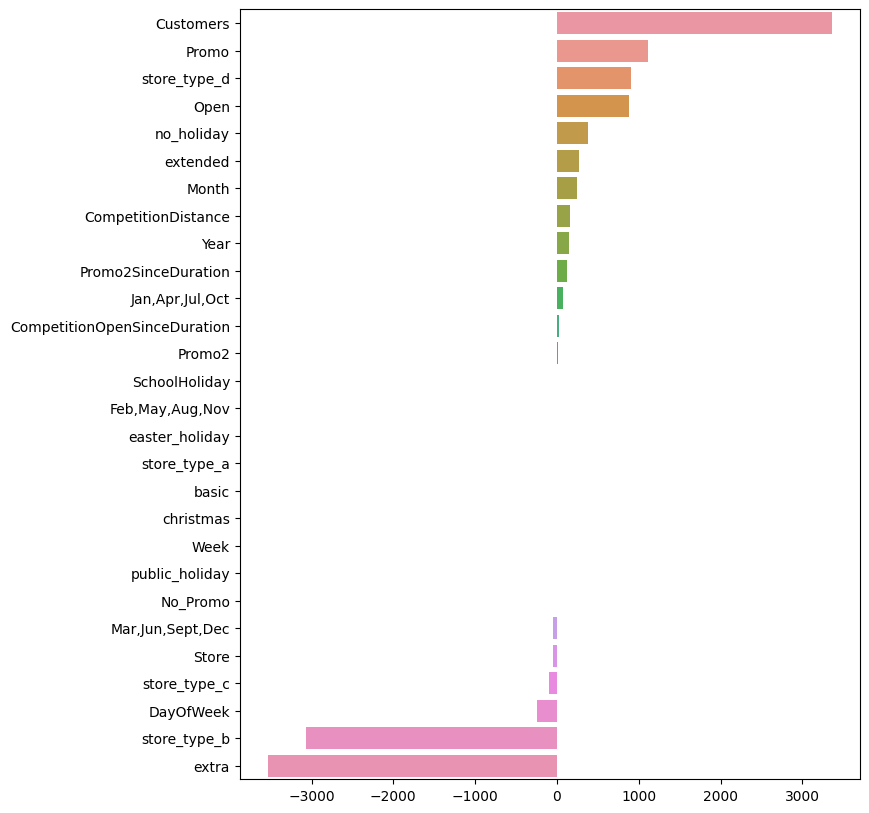

In [14]:
plt.figure(figsize=(8,10))
features_coef = features_coef.sort_values(ascending=False)
sns.barplot(y=features_coef.index, x=features_coef)
plt.show()

In [15]:
features_coef = features_coef.apply(lambda x: np.abs(x))
features_coef = features_coef[features_coef_order]

In [16]:
features_names = features_coef[features_coef > 0.0000001]
features_names

Store                             48.767809
DayOfWeek                        241.038957
Customers                       3357.781017
Open                             877.694944
Promo                           1109.040150
SchoolHoliday                      6.294479
CompetitionDistance              153.724111
Promo2                            17.296187
Jan,Apr,Jul,Oct                   76.963667
Feb,May,Aug,Nov                    0.157730
Mar,Jun,Sept,Dec                  44.857044
Year                             144.603820
Month                            249.830309
CompetitionOpenSinceDuration      27.526108
Promo2SinceDuration              117.742382
no_holiday                       379.738762
extra                           3531.650668
extended                         267.525063
store_type_b                    3070.547027
store_type_c                      93.025302
store_type_d                     902.225504
dtype: float64

In [17]:
X_train_new = X_train_tr[features_names.index]
X_test_new = X_test_tr[features_names.index]

In [18]:
linear_dict = train_model(X_train_new,y_train, model_list, 10)

LinearRegression


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.826372,0.030001,0.901620,0.901093,-1200.601940,-1209.712044
1,0.806345,0.021032,0.901195,0.901140,-1202.526298,-1209.501705
2,0.798921,0.021003,0.900589,0.901208,-1223.910822,-1207.115331
3,0.799627,0.021078,0.900762,0.901188,-1212.334789,-1208.411614
4,0.780730,0.022003,0.900666,0.901196,-1202.343527,-1209.523643
5,0.789968,0.020006,0.902008,0.901049,-1203.244120,-1209.420807
6,0.774966,0.021004,0.899475,0.901329,-1213.737765,-1208.258050
7,0.823362,0.025003,0.901821,0.901071,-1200.269775,-1209.749490
8,1.017966,0.029000,0.900699,0.901196,-1222.773721,-1207.243289
9,1.115001,0.027000,0.902471,0.900996,-1206.744716,-1209.032923


ElasticNet


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.606995,0.024001,0.778281,0.777612,-1802.380526,-1813.946435
1,0.408002,0.022998,0.778547,0.777406,-1800.307627,-1814.898432
2,0.383042,0.020999,0.778377,0.777240,-1827.430329,-1812.622182
3,0.412580,0.020999,0.776282,0.777570,-1820.263793,-1813.036206
4,0.408129,0.022003,0.779080,0.777619,-1793.071859,-1814.576980
5,0.481968,0.021000,0.777081,0.777413,-1814.818005,-1813.921819
6,0.396041,0.021999,0.774154,0.777987,-1819.252837,-1812.397000
7,0.417245,0.021999,0.777230,0.777622,-1807.999883,-1813.756737
8,0.386455,0.022051,0.775748,0.777472,-1837.544010,-1811.752880
9,0.371969,0.020998,0.779965,0.776925,-1812.571355,-1814.836763


Ridge


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.292668,0.022033,0.901620,0.901093,-1200.600396,-1209.711965
1,0.287030,0.021003,0.901196,0.901140,-1202.524050,-1209.501612
2,0.286003,0.021004,0.900588,0.901208,-1223.916046,-1207.115200
3,0.279000,0.021002,0.900762,0.901188,-1212.337496,-1208.411079
4,0.290967,0.021003,0.900666,0.901196,-1202.345440,-1209.523150
5,0.281428,0.021003,0.902009,0.901050,-1203.241778,-1209.419973
6,0.288002,0.021003,0.899474,0.901329,-1213.740042,-1208.257232
7,0.279999,0.021031,0.901821,0.901071,-1200.272569,-1209.749144
8,0.279404,0.021000,0.900699,0.901196,-1222.774054,-1207.243128
9,0.292967,0.022001,0.902471,0.900996,-1206.745946,-1209.032735


Lasso


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.530317,0.021002,0.901595,0.901075,-1200.755961,-1209.824744
1,0.542629,0.022001,0.901222,0.901121,-1202.364871,-1209.613796
2,0.535997,0.021998,0.900551,0.901190,-1224.149441,-1207.228038
3,0.584645,0.020998,0.900731,0.901170,-1212.524383,-1208.523445
4,0.624858,0.021004,0.900691,0.901177,-1202.194963,-1209.636032
5,0.566967,0.023000,0.901993,0.901031,-1203.336349,-1209.532199
6,0.523998,0.020999,0.899423,0.901310,-1214.049892,-1208.369765
7,0.545000,0.022000,0.901802,0.901052,-1200.387125,-1209.861819
8,0.530995,0.021000,0.900641,0.901177,-1223.134314,-1207.355901
9,0.601017,0.020001,0.902475,0.900978,-1206.723577,-1209.144601


In [19]:
ridge_model_new = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10], cv=10).fit(X_train_new,y_train)
ridge_model_new.score(X_test_new, y_test)

ridge_tuned_new = Ridge(alpha = ridge_model_new.alpha_).fit(X_train_new,y_train)
y_pred_new = ridge_tuned_new.predict(X_test_new)

print(f'Optimal Ridge at alpha = {ridge_model_new.alpha_}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred_new))}')
print(f'R2: {r2_score(y_test,y_pred_new)}')

Optimal Ridge at alpha = 1.0
RMSE: 1203.8260645520113
R2: 0.90161407702793


### MISCELLANEOUS: Training of Common Non-linear Regression Models

In [ ]:
# Decision Tree 
information_models = [DecisionTreeRegressor()]
information_models_dict = train_model(X_train,y_train, information_models, 10)

In [ ]:
# KNN
other_models = [KNeighborsRegressor()]
other_models_dict = train_model(X_train_tr,y_train, other_models, 10)

In [ ]:
# SVM
other_models = [KNeighborsRegressor(), SVR()]
other_models_dict = train_model(X_train_tr,y_train, other_models, 10)

In [ ]:
# Random Forest
information_models = [DecisionTreeRegressor(), RandomForestRegressor()]
information_models_dict = train_model(X_train,y_train, information_models, 10)